In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
file_name = r"sht75_nblab03_Hum_Temp_RUN_20221221080550_1_h.txt"
data = pd.read_csv(file_name, sep=" ", header=0)


In [3]:
data.head()

,n,anno,mese,giorno,hum_int,hum_corrected,RH_raw,RH_true,temp_int,temp_corr
0,0,2022,12,21,29150.0,0.401033,1505,46.31,6144.0,21.84
1,1,2022,12,21,29151.4,1.201692,1505,49.16,6144.0,21.84
2,2,2022,12,21,29151.4,1.601970,1505,49.16,6143.0,21.83
3,3,2022,12,21,29152.4,2.002295,1505,49.16,6144.0,21.84
4,4,2022,12,21,29152.4,2.402797,1505,49.16,6142.0,21.82


(array([48.8, 49. , 49.2, 49.4, 49.6, 49.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

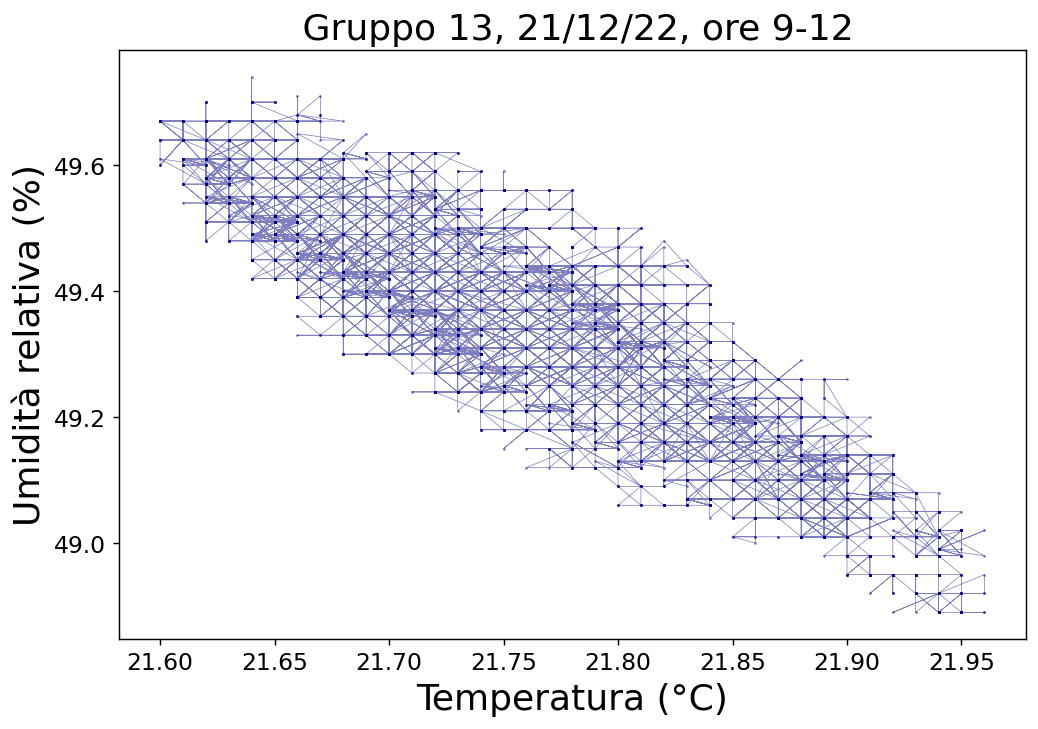

In [4]:

plt.figure(figsize =(9,6),dpi = 130)
plt.plot(data["temp_corr"][1:], data["RH_true"][1:], "-o",  alpha = 0.5, color = "navy", markersize  =0.5, linewidth = 0.4)
plt.xlabel("Temperatura (°C)", fontsize = 20)
plt.ylabel("Umidità relativa (%)", fontsize = 20)
#plt.ylim(58.4,58.9)
plt.title(" Gruppo 13, 21/12/22, ore 9-12", fontsize = 20)
len(data["temp_corr"])
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

In [ ]:
plt.

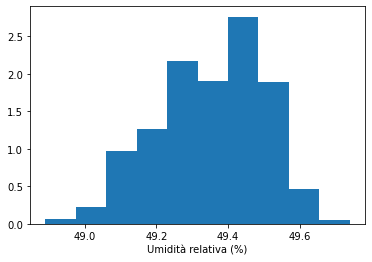

In [34]:
#x = np.arange(58.4, 58.9, 0.001)
media_u= np.mean(data["RH_true"][1:])
sigma_u =np.std(data["RH_true"][1:])
y = [stats.norm.pdf(i,media_u, sigma_u) for i in x]
b = plt.hist(data["RH_true"][1:], density = True) 
#plt.plot(x,y, color = "red")
plt.xlabel("Umidità relativa (%)")

plt.show()


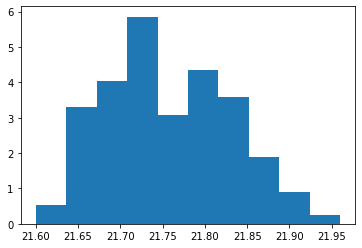

In [35]:
b = plt.hist(data["temp_corr"][1:], density = True) 

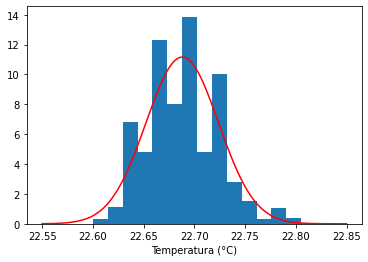

In [11]:
x = np.arange(22.55, 22.85, 0.001)
media_t= np.mean(data["temp_corr"])
sigma_t =np.std(data["temp_corr"])
y = [stats.norm.pdf(i,media_t, sigma_t) for i in x]
b = plt.hist(data["temp_corr"], density = True, bins = 15) 
a = plt.plot(x,y, color = "red")
plt.xlabel("Temperatura (°C)")

plt.show()


In [12]:
len(data["RH_true"])

28237

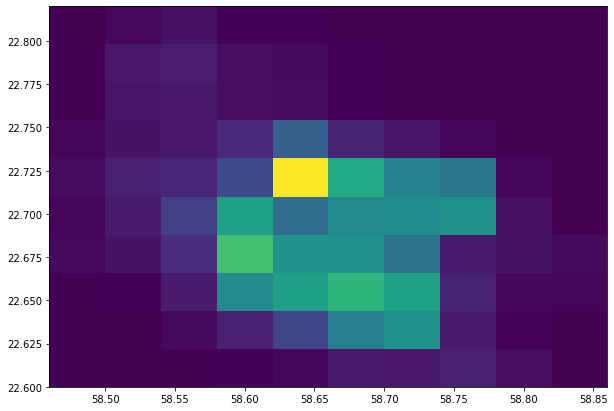

In [13]:
fig = plt.subplots(figsize =(10, 7))

heat = plt.hist2d(data["RH_true"][1:],data["temp_corr"][1:])


In [53]:
s = 0
correlations = []
sets = []
step = 100
for i in range(step+1,28000,step):
    a =  data["RH_true"][i-step+1:i]
    
    b = data["temp_corr"][i-step+1:i]
    corr = np.corrcoef(a,b)
    s +=1
    sets.append(s)
    
    correlations.append(corr[0,1])

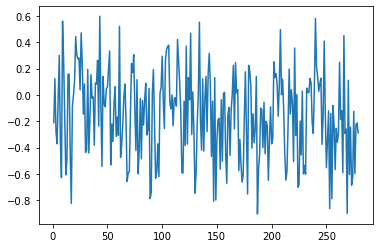

In [54]:
plt.plot(sets,correlations)

In [14]:
count = 0
for i in range(len(data["RH_true"])):
    if data["RH_true"][i]<57.5:
        count+=1
        print(i)
print(count)      

0
1


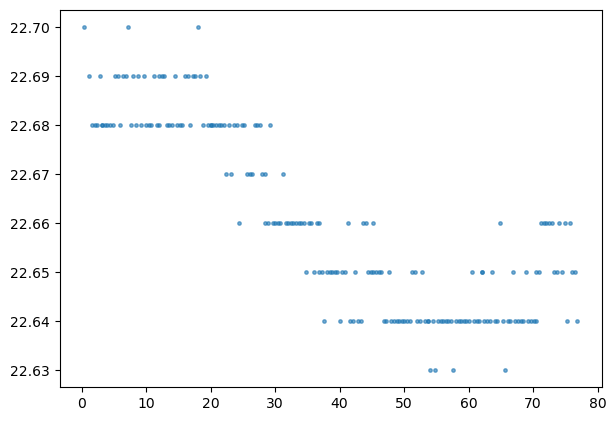

In [16]:
plt.figure(figsize =(7,5),dpi = 100)
plt.scatter(data["hum_corrected"][0:200], data["temp_corr"][0:200], alpha = 0.6, s=6)

In [24]:
data["hum_corrected"][200:400].corr(data["temp_corr"][200:400])

-0.6143335172744103

In [25]:
data["hum_corrected"][1:200].corr(data["temp_corr"][1:200])

-0.8380692341678544